In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 800)
import seaborn as sn
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

In [151]:
StandardScaler??

In [44]:
train_df = pd.read_csv("./train_origin.csv")

In [22]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

In [4]:
train_df.shape

(1460, 81)

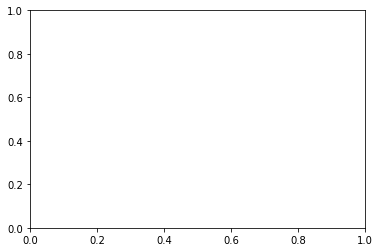

In [22]:
fig,ax = plt.subplots()

In [11]:
sn.distplot(train_df['SalePrice'],bins=20,fit=norm,ax = ax)

In [13]:
sn.distplot??

In [19]:
fig.savefig("./SalePriceDist.png",dpi = 200)

In [12]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
train_df['SalePrice'].skew()

1.8828757597682129

In [16]:
train_df['SalePrice'].kurt()

6.536281860064529

In [30]:
stats.probplot(train_df['SalePrice'],plot = ax)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519417, 180921.19589041095, 0.9319665641512986))

In [33]:
ax.set_title("SalePrice")

Text(0.5, 1, 'SalePrice')

In [35]:
fig.savefig("./SalePriceprobplot.png",dpi = 200)

In [24]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Then we have to divide our features into two categories: numerical features and categorical features

1. Numerical Features
the numberical features are as follows:
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
GarageArea
GrLivArea

In [201]:
train_df.Lot

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,196.0,Gd,TA,PConc,1,1,1,1,706,1,0,150,856,GasA,Ex,Y,1,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,1,1,2,548,1,1,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,2,0.0,TA,TA,CBlock,2,2,2,2,978,2,0,284,1262,GasA,Ex,Y,2,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,2,2,2,460,2,2,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,3,162.0,Gd,TA,PConc,3,3,3,3,486,3,0,434,920,GasA,Ex,Y,3,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,3,3,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,4,0.0,TA,TA,BrkTil,4,4,4,4,216,4,0,540,756,GasA,Gd,Y,4,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,4,4,3,642,4,4,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,5,350.0,Gd,TA,PConc,5,5,5,5,655,5,0,490,1145,GasA,Ex,Y,5,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,5,5,5,3,836,5,5,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
numerical_list = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotalBsmtSF','GarageArea','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

In [48]:
corr = train_df[numerical_list].corr(method='pearson')

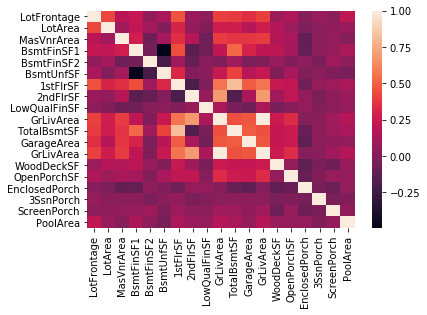

In [50]:
fig,ax = plt.subplots()
sn.heatmap(corr,ax=ax)

In [51]:
fig.savefig("continuous.png",dpi = 200)

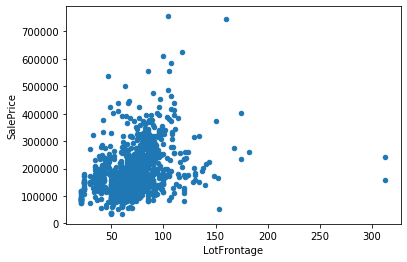

In [28]:
feature = 'LotFrontage'
data = pd.concat([train_df['SalePrice'],train_df[feature]],axis =1)
data.plot.scatter(x=feature,y="SalePrice")

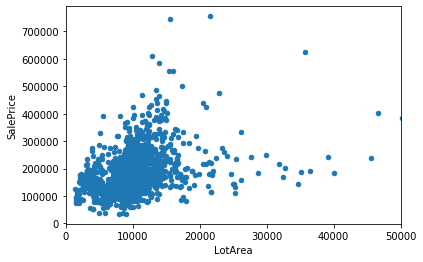

In [33]:
feature = 'LotArea'
data = pd.concat([train_df['SalePrice'],train_df[feature]],axis =1)
data.plot.scatter(x=feature,y="SalePrice",xlim=(0,50000))

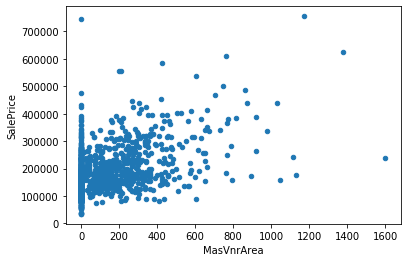

In [34]:
feature = 'MasVnrArea'
data = pd.concat([train_df['SalePrice'],train_df[feature]],axis =1)
data.plot.scatter(x=feature,y="SalePrice")

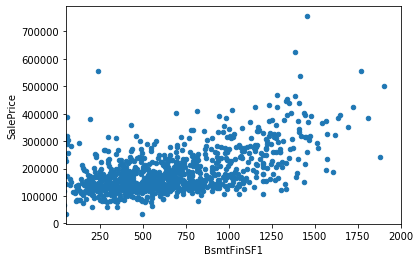

In [38]:
feature = 'BsmtFinSF1'
data = pd.concat([train_df['SalePrice'],train_df[feature]],axis =1)
data.plot.scatter(x=feature,y="SalePrice")

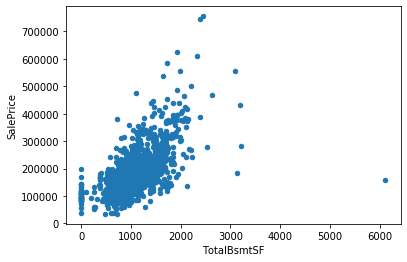

In [27]:
feature = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'],train_df[feature]],axis =1)
data.plot.scatter(x=feature,y="SalePrice")

In [40]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


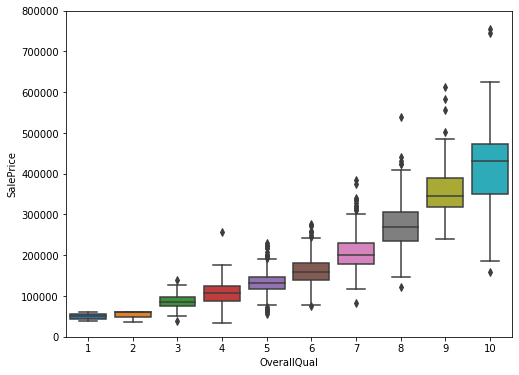

In [55]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sn.boxplot(x=var, y="SalePrice", data=train_df,ax =ax)
fig.axis(ymin=0, ymax=800000);
f.savefig("./OverallQualboxplot.png",dpi=200)

In [54]:
plt.subplots??

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


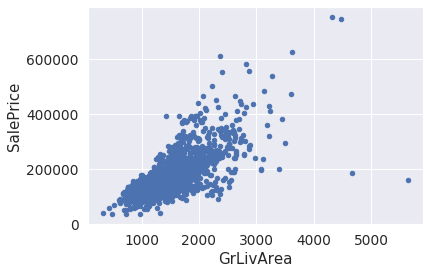

In [84]:
train_df.plot.scatter(x=var,y="SalePrice")

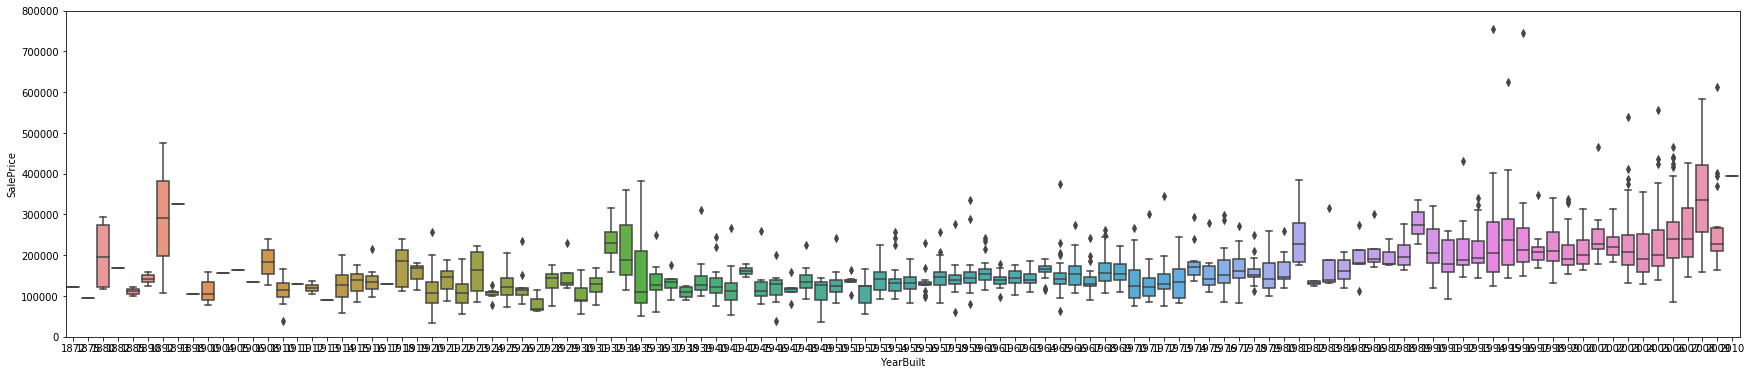

In [52]:
#box plot overallqual/saleprice
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
fig = sn.boxplot(x=var, y="SalePrice", data=train_df)
fig.axis(ymin=0, ymax=800000);

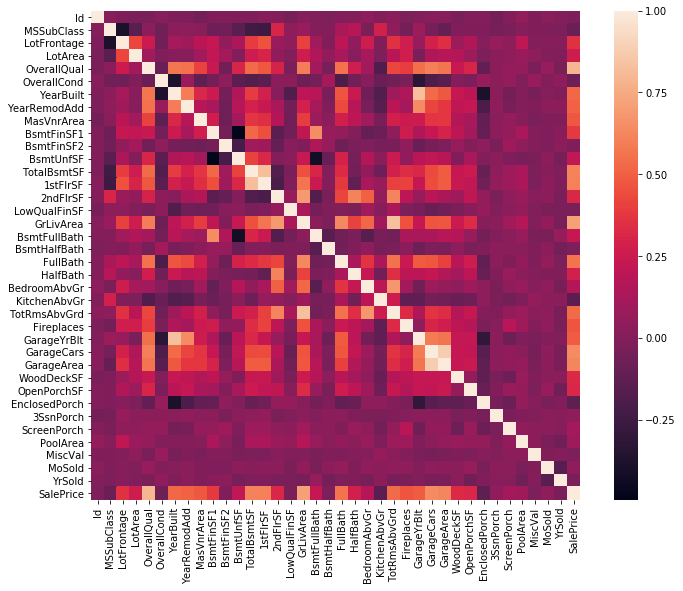

In [56]:
corr = train_df.corr(method='pearson')
f,ax = plt.subplots(figsize=(12,9))
sn.heatmap(corr,square=True)
f.savefig("./corrlation.png",dpi = 200)

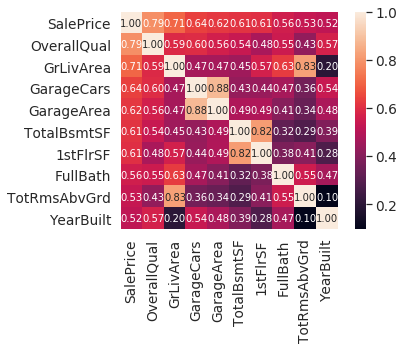

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'], dtype='object')

In [81]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index ##get the top k columns
cm = np.corrcoef(train_df[cols].values.T) ##get all the k columns and calculate corrcoef
sn.set(font_scale=1.25)
hm = sn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
cols

/home/fuyonghao/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


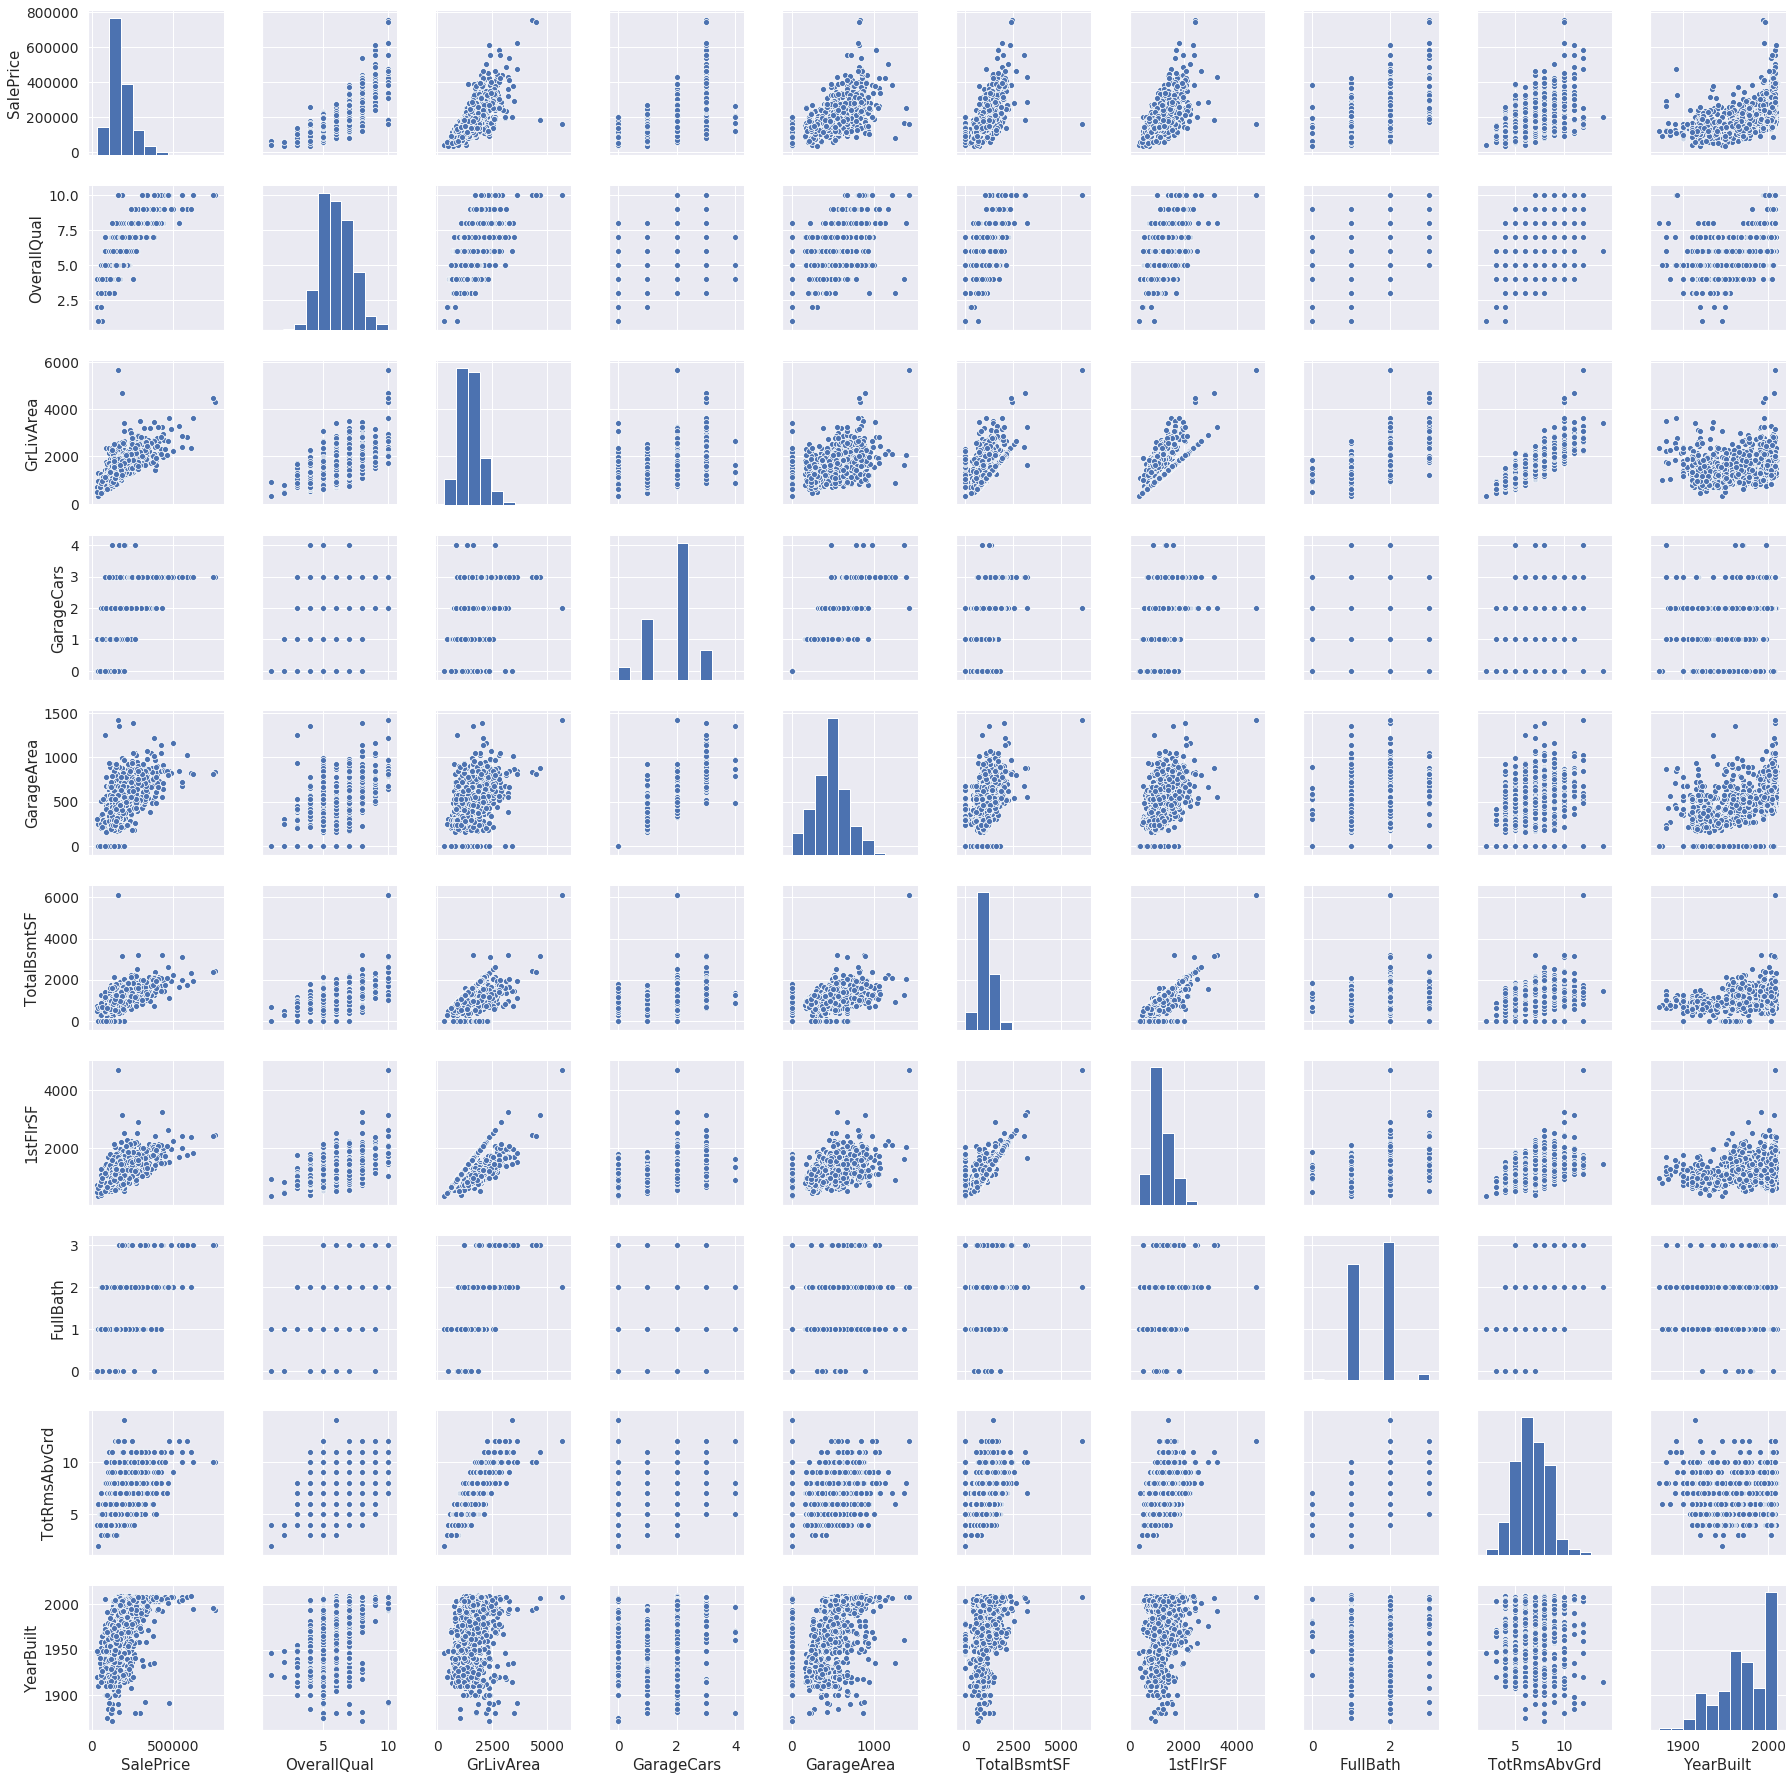

In [80]:
sn.pairplot(train_df[cols], size = 2.5) ##plot all the scatter of each pair of features in cols 
plt.show();

In [97]:
(train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0])[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [37]:
drop_list = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']## the features that about to drop
train_df = train_df.drop(labels=drop_list,axis=1)

In [115]:
fill_list = ['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical']
fill_cate = ['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']

In [117]:
train_df[fill_cate].head()

,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical
0,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr
1,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,Gd,None,SBrkr
2,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,Gd,BrkFace,SBrkr
3,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,TA,None,SBrkr
4,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,Gd,BrkFace,SBrkr


In [114]:
train_df['MasVnrArea'] = train_df.MasVnrArea.fillna(train_df.MasVnrArea.describe()['mean'])

In [148]:
for col in fill_cate:
    label = train_df[col].value_counts().sort_values(ascending = False).index[0] ##get the most frequent category
    train_df[col] = train_df.fillna(label)
##using the most frequent label to fill the na value

In [152]:
train_df.to_csv("./train.csv",index=False) ##save the temporary dataset

In [280]:
train_df = pd.read_csv("./train.csv")

In [153]:
scaler = StandardScaler()

In [160]:
price = np.array(train_df['SalePrice'])
std_price = scaler.fit_transform(price.reshape(-1,1))

In [195]:
std_price.sort(axis = 0)

In [179]:
std_price[:10,0]

array([-1.83870376, -1.83352844, -1.80092766, -1.78329881, -1.77448439,
       -1.62337999, -1.61708398, -1.58560389, -1.58560389, -1.5731    ])

In [181]:
std_price[-10:,0]

array([3.82897043, 4.04098249, 4.49634819, 4.71041276, 4.73032076,
       5.06214602, 5.42383959, 5.59185509, 7.10289909, 7.22881942])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


skewness: 1.366560
 kurtosis: 4.895121



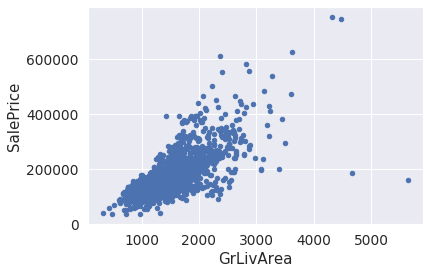

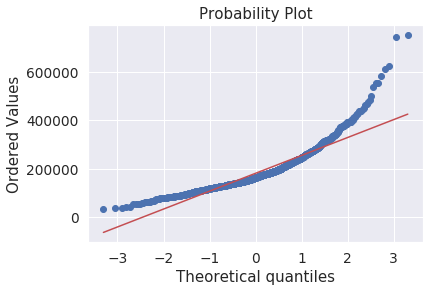

In [245]:
var = 'GrLivArea'
train_df[[var,'SalePrice']].plot.scatter(x=var,y='SalePrice')
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
print("skewness: %f\n kurtosis: %f\n" %(train_df[var].skew(),train_df[var].kurt()))

In [ ]:
var = 'GrLivArea'
train_df[[var,'SalePrice']].plot.scatter(x=var,y='SalePrice')
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
print("skewness: %f\n kurtosis: %f\n" %(train_df[var].skew(),train_df[var].kurt()))

skewness: 1.882876
 kurtosis: 6.536282



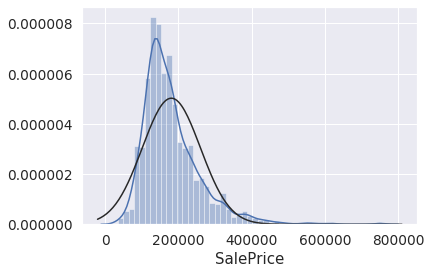

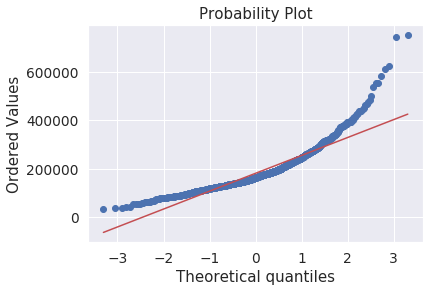

In [248]:
var = "SalePrice"
sn.distplot(train_df[var],fit=norm)
fig = plt.figure()
res = stats.probplot(train_df[var], plot=plt)
print("skewness: %f\n kurtosis: %f\n" %(train_df[var].skew(),train_df[var].kurt()))

LotArea skewness: 12.207688
 LotArea kurtosis: 203.243271



ValueError: cannot convert float NaN to integer

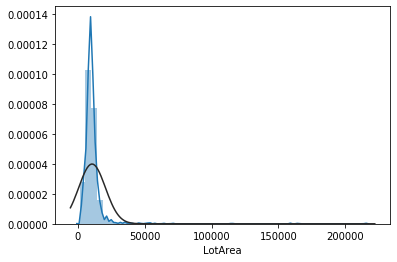

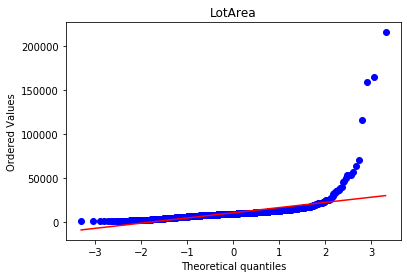

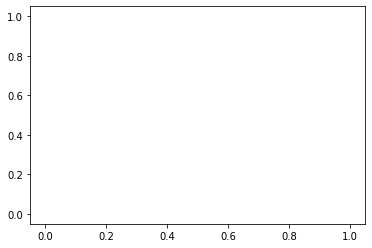

In [39]:
for var in numerical_list:
    if var not in drop_list:
        fig,ax = plt.subplots()
        sn.distplot(train_df[var],fit=norm,ax=ax)
        fig.savefig(var+"dist.png",dpi=200)
        fig,ax = plt.subplots()
        res = stats.probplot(train_df[var], plot=ax)
        fig.savefig(var+"probplot.png",dpi=200)
        ax.set_title(var)
        print("%s skewness: %f\n %s kurtosis: %f\n" %(var,train_df[var].skew(),var,train_df[var].kurt()))

Text(0.5, 1, 'Log_LotArea')

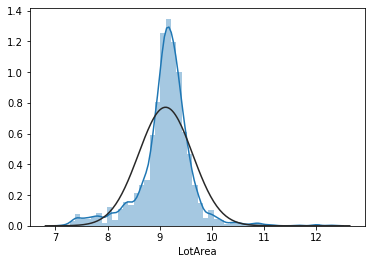

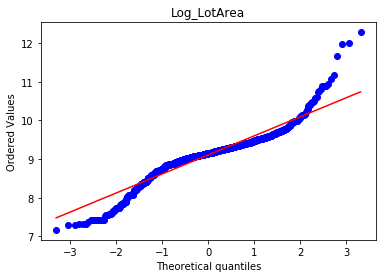

In [43]:
fig,ax = plt.subplots()
sn.distplot(np.log(train_df["LotArea"]),fit=norm,ax=ax)
fig.savefig("log_lotarea"+"dist.png",dpi=200)
fig,ax = plt.subplots()
res = stats.probplot(np.log(train_df["LotArea"]), plot=ax)
fig.savefig("log_lotarea"+"probplot.png",dpi=200)
ax.set_title("Log_LotArea")

In [282]:
train_df.SalePrice = np.log(train_df.SalePrice)

In [283]:
train_df.LotArea = np.log(train_df.LotArea)

In [284]:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQualtrain_df.MasVnrArea[train_df.MasVnrArea>0] = np.log(train_df.MasVnrArea[train_df.MasVnrArea>0])

/home/fuyonghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


LotArea skewness: -0.137994
 LotArea kurtosis: 4.713358

MasVnrArea skewness: 0.483252
 MasVnrArea kurtosis: -1.638099

BsmtFinSF1 skewness: 1.685503
 BsmtFinSF1 kurtosis: 11.118236

BsmtUnfSF skewness: 0.920268
 BsmtUnfSF kurtosis: 0.474994

TotalBsmtSF skewness: 1.524255
 TotalBsmtSF kurtosis: 13.250483

GarageArea skewness: 0.179981
 GarageArea kurtosis: 0.917067

GrLivArea skewness: 1.366560
 GrLivArea kurtosis: 4.895121



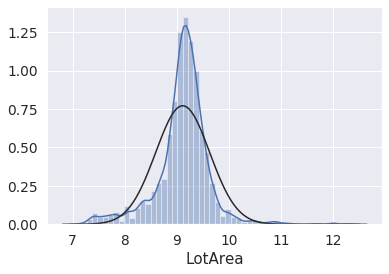

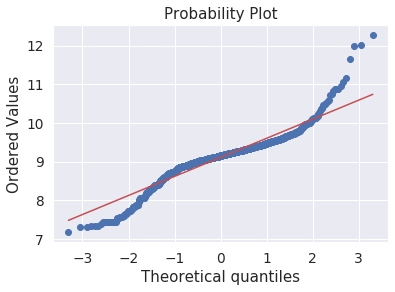

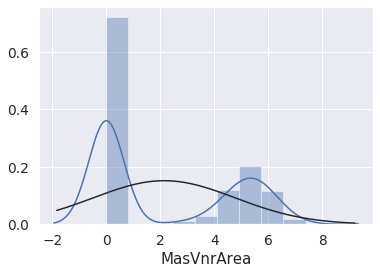

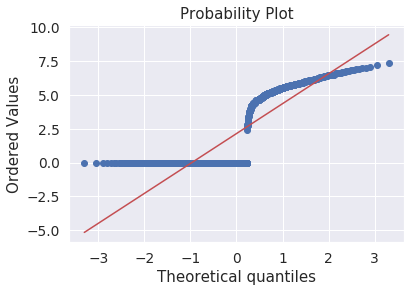

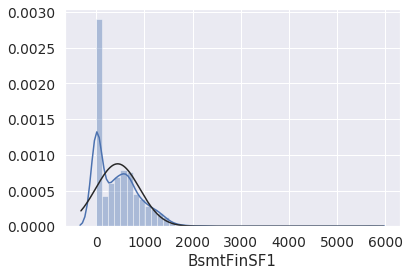

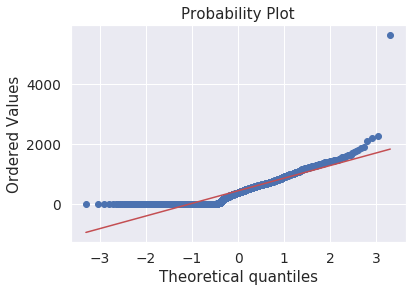

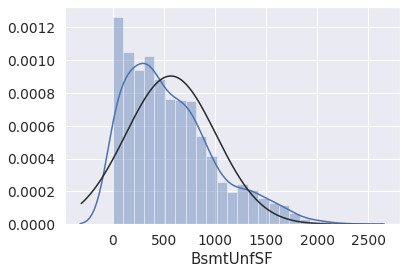

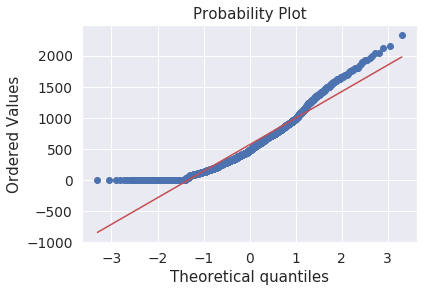

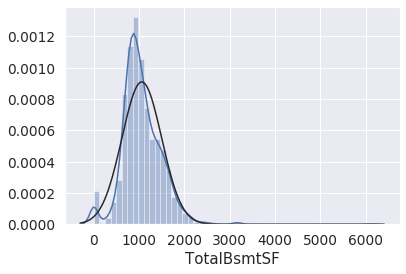

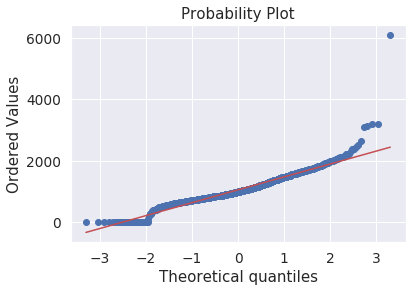

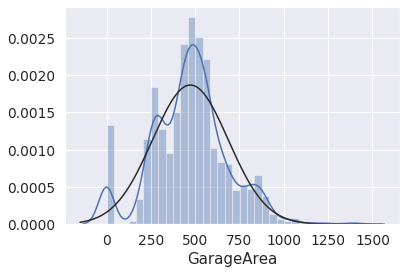

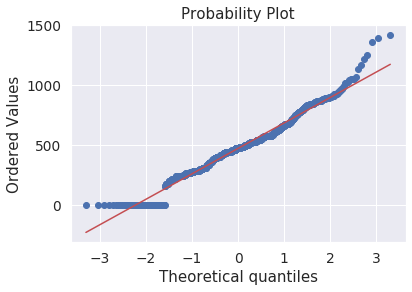

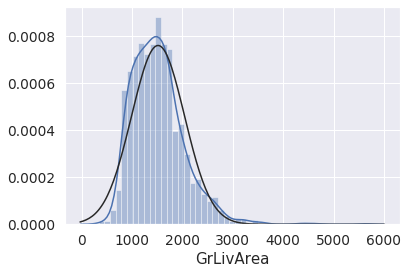

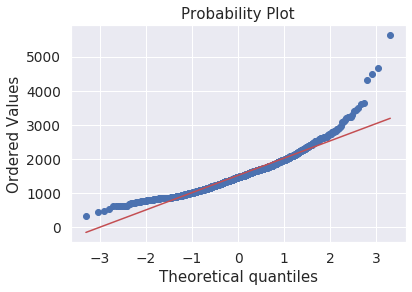

<Figure size 432x288 with 0 Axes>

In [286]:
for var in numerical_list:
    if var not in drop_list:
        sn.distplot(train_df[var],fit=norm)
        fig = plt.figure()
        res = stats.probplot(train_df[var], plot=plt)
        print("%s skewness: %f\n %s kurtosis: %f\n" %(var,train_df[var].skew(),var,train_df[var].kurt()))
        fig = plt.figure()

In [276]:
train_df.MasVnrArea[train_df.MasVnrArea==0].sum()

0.0

In [287]:
train_df.to_csv("./train_loged.csv")

In [ ]:
train_df.BsmtFinSF1 = np.log(train_df.BsmtFinSF1)

In [215]:
numerical_list

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1scedasticity',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'GrLivArea']

In [234]:
pd.get_dummies??

In [240]:
pd.get_dummies(train_df)

,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
